In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[0]

In [0]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

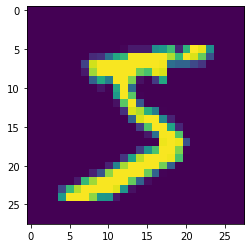

In [0]:
plt.imshow(single_image)

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [0]:
y_example.shape

(60000, 10)

In [0]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
single_image.min

<function ndarray.min>

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
scaled_image = x_train[0]

In [0]:
scaled_image.max()

1.0

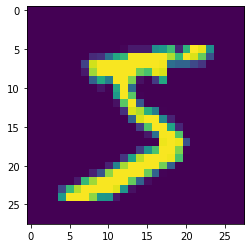

In [0]:
plt.imshow(scaled_image)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#OUTPUT LAYER SOFTMAX--> MULTI CLASS PROBLEM
model.add(Dense(10,activation='softmax'))

#keras.io/metrics

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [0]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1487 - accuracy: 0.9548 - val_loss: 0.0590 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0543 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0404 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0407 - val_accuracy: 0.9865


In [0]:
metrics = pd.DataFrame(model.history.history)

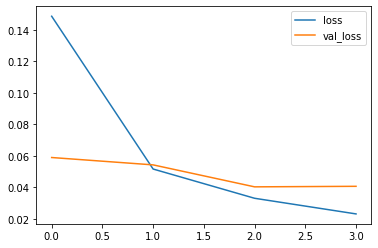

In [0]:
metrics[['loss','val_loss']].plot()

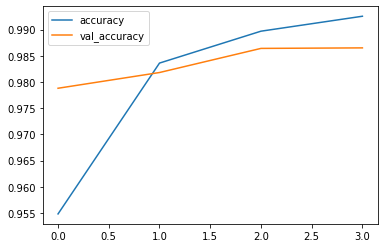

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
model.metrics_names

['loss', 'accuracy']

In [0]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04070017486810684, 0.9865000247955322]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_cat_test.shape

(10000, 10)

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[ 969,    0,    2,    1,    0,    1,    0,    0,    0,    7],
       [   1, 1125,    3,    2,    0,    0,    2,    1,    0,    1],
       [   1,    1, 1021,    3,    0,    0,    1,    3,    1,    1],
       [   0,    0,    3, 1003,    0,    3,    0,    0,    1,    0],
       [   0,    0,    1,    0,  972,    0,    2,    0,    0,    7],
       [   1,    0,    0,    6,    0,  884,    1,    0,    0,    0],
       [   8,    3,    0,    1,    1,    2,  943,    0,    0,    0],
       [   0,    0,    7,    1,    0,    0,    0, 1019,    1,    0],
       [   6,    0,    5,    2,    4,    1,    3,    1,  945,    7],
       [   0,    2,    1,    5,    7,    3,    0,    6,    1,  984]])

In [0]:
import seaborn as sns

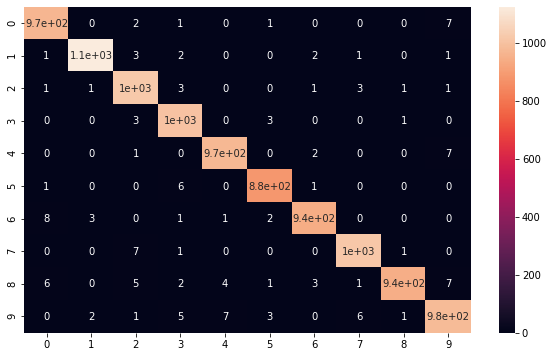

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [0]:
my_number = x_test[0]

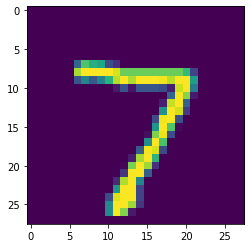

In [0]:
plt.imshow(my_number.reshape(28,28))

In [0]:
#num_images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])